# GALPY Project Notebook

In [10]:
!pip install galpy  # Comand to install Galpy

In [11]:
!pip show galpy #Main packages requirments

Name: galpy
Version: 1.10.2
Summary: Galactic Dynamics in python
Home-page: http://github.com/jobovy/galpy
Author: Jo Bovy
Author-email: bovy@astro.utoronto.ca
License: New BSD
Location: C:\Users\chris\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages
Requires: matplotlib, numpy, packaging, scipy
Required-by: 


J_R = 0.0092
L_z = 1.1000
J_z = 0.0093


<Figure size 800x500 with 0 Axes>

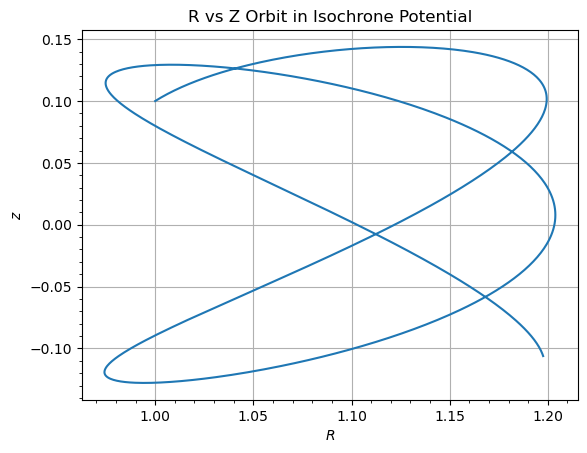

<Figure size 600x600 with 0 Axes>

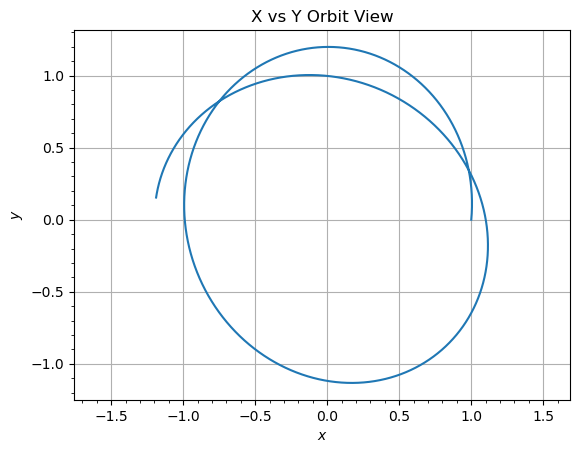

In [19]:

#Code example to show the star orbit as it wraps arround the galaxy
import numpy as np
import matplotlib.pyplot as plt
from galpy.orbit import Orbit
from galpy.potential import IsochronePotential
from galpy.actionAngle import actionAngleStaeckel

# Define the potential (scale = 1 kpc, 220 km/s)
ip = IsochronePotential(normalize=1.0, b=0.8)

# Define a safe, bound orbit
# [R, vR, vT, z, vz, phi] in galpy units
o = Orbit([1.0, 0.1, 1.1, 0.1, 0.1, 0.0])
ts = np.linspace(0, 10, 1000)
o.integrate(ts, ip)

# Setup Staeckel action calculator
aAS = actionAngleStaeckel(pot=ip, delta=0.5)

# Compute actions at t = 0
R0 = o.R(ts[0])
vR0 = o.vR(ts[0])
vT0 = o.vT(ts[0])
z0 = o.z(ts[0])
vz0 = o.vz(ts[0])
jr, lz, jz = aAS(R0, vR0, vT0, z0, vz0)

# Print the results
print(f"J_R = {jr.item():.4f}")
print(f"L_z = {lz.item():.4f}")
print(f"J_z = {jz.item():.4f}")


# Plot R-z orbit
plt.figure(figsize=(8, 5))
o.plot(d1='R', d2='z')
plt.title('R vs Z Orbit in Isochrone Potential')
plt.grid(True)
plt.show()

# Plot X-Y orbit
plt.figure(figsize=(6, 6))
o.plot(d1='x', d2='y')
plt.title('X vs Y Orbit View')
plt.axis('equal')
plt.grid(True)
plt.show()
#Figure 1 is the X vs Y ORBIT